In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D


### importing the algorithms

In [7]:
from lin_sep import lp_cvxpy
from lin_sep import lp_prev
from lin_sep import lp_scipy
from lin_sep import lp_sphere


# Benchmark Testing for Linear Seperability Algorithms



## initial setup



In [2]:
#n is number of points
#d is number of dimensions
def benchmarking_original(n, d, iter_n=False):
    def generate_random_points(num_points, dim):
        return [tuple(np.random.rand(dim)) for _ in range(num_points)]

    # Benchmarking
    label = "Dimension"
    if(iter_n):
      label = "Number of points"


    dimensions = d  # list
    num_points = n

    runtimesOriginal = []
    for dim in dimensions:
        points1 = generate_random_points(num_points, dim)
        points2 = generate_random_points(num_points, dim)

        start_time = time.time()
        lp_prev.lin_sep(points1, points2, dim)


        end_time = time.time()

        runtime = end_time - start_time
        runtimesOriginal.append(runtime)
        print(f"{label}: {dim}, Runtime: {runtime:.5f} seconds")
    return dimensions, runtimesOriginal

def benchmarking_sphere(n, d, iter_n=False):

    def generate_random_points(num_points, dim):
        return [tuple(np.random.rand(dim)) for _ in range(num_points)]

    # Benchmarking
    label = "Dimension"
    if(iter_n):
      label = "Number of points"


    dimensions = d  # list
    num_points = n
    runtimesSphere = []
    for dim in dimensions:
        points1 = generate_random_points(num_points, dim)
        points2 = generate_random_points(num_points, dim)

        start_time = time.time()
        lp_sphere.lin_sep(points1, points2, dim)
        end_time = time.time()

        runtime = end_time - start_time
        runtimesSphere.append(runtime)
        print(f"{label}: {dim}, Runtime: {runtime:.5f} seconds")
    return dimensions, runtimesSphere

def benchmarking_cvx(n, d, iter_n=False):

    def generate_random_points(num_points, dim):
        return [tuple(np.random.rand(dim)) for _ in range(num_points)]


    # Benchmarking
    label = "Dimension"
    if(iter_n):
      label = "Number of points"


    dimensions = d
    num_points = n
    runtimesCvx = []
    for dim in dimensions:
        points1 = generate_random_points(num_points, dim)
        points2 = generate_random_points(num_points, dim)

        start_time = time.time()
        lp_cvxpy.lin_sep(points1, points2, dim)
        end_time = time.time()

        runtime = end_time - start_time
        runtimesCvx.append(runtime)
        print(f"{label}: {dim}, Runtime: {runtime:.5f} seconds")
    return dimensions, runtimesCvx

def benchmarking_scipy(n, d, iter_n=False):
    def generate_random_points(num_points, dim):
        return [tuple(np.random.rand(dim)) for _ in range(num_points)]

     # Benchmarking
    label = "Dimension"
    if(iter_n):
      label = "Number of points"


    dimensions = d
    num_points = n
    runtimesScipy = []
    for dim in dimensions:
        points1 = generate_random_points(num_points, dim)
        points2 = generate_random_points(num_points, dim)

        start_time = time.time()
        lp_scipy.lin_sep(points1, points2, dim)
        end_time = time.time()

        runtime = end_time - start_time
        runtimesScipy.append(runtime)
        print(f"{label}: {dim}, Runtime: {runtime:.5f} seconds")
    return dimensions, runtimesScipy



def show_plots(o=False,sp=False,c=False,sc=False, n=0,d=None, n_iter=None, iter_num=False):
    if(iter_num == False):
      plt.figure(figsize=(10, 6))
      plt.xlabel('Dimensions')
      plt.ylabel('Runtime (seconds)')
      plt.title('Runtime of lin_sep Function vs Dimensions')
      plt.grid(True)


      if(o):
        dim, run = benchmarking_original(n, d)
        plt.plot(dim, run, marker='o', label ='original')
      if(sp):
        dim, run = benchmarking_sphere(n, d)
        plt.plot(dim, run, marker='o', label ='sphere')
      if(c):
        dim, run = benchmarking_cvx(n, d)
        plt.plot(dim, run, marker='o', label ='cvx')
      if(sc):
        dim, run = benchmarking_scipy(n, d)
        plt.plot(dim, run, marker='o', label ='scipy')
    else:
      plt.figure(figsize=(10, 6))
      plt.xlabel('Number of points')
      plt.ylabel('Runtime (seconds)')
      plt.title('Runtime of lin_sep Function vs Number of points')
      plt.grid(True)
      if(o):
        num_p, run = benchmarking_original(d, n_iter, iter_n=True)
        plt.plot(num_p, run, marker='o', label ='original')
      if(sp):
        num_p, run = benchmarking_sphere(d, n_iter, iter_n=True)
        plt.plot(num_p, run, marker='o', label ='sphere')
      if(c):
        num_p, run = benchmarking_cvx(d, n_iter, iter_n=True)
        plt.plot(num_p, run, marker='o', label ='cvx')
      if(sc):
        num_p, run = benchmarking_scipy(d, n_iter, iter_n=True)
        plt.plot(num_p, run, marker='o', label ='scipy')


    plt.legend()
    plt.tight_layout()
    plt.show()

## num_points = 100, dim = [1,2,3,4,5]

Dimension: 1, Runtime: 0.02915 seconds
Dimension: 2, Runtime: 0.07800 seconds
Dimension: 3, Runtime: 0.33900 seconds
Dimension: 4, Runtime: 10.58944 seconds
Dimension: 5, Runtime: 613.83027 seconds
Dimension: 1, Runtime: 0.09253 seconds
Dimension: 2, Runtime: 0.05439 seconds
Dimension: 3, Runtime: 0.04505 seconds
Dimension: 4, Runtime: 0.04952 seconds
Dimension: 5, Runtime: 0.04564 seconds
Dimension: 1, Runtime: 0.18272 seconds
Dimension: 2, Runtime: 0.11592 seconds
Dimension: 3, Runtime: 0.11700 seconds
Dimension: 4, Runtime: 0.17501 seconds
Dimension: 5, Runtime: 0.12486 seconds
Dimension: 1, Runtime: 0.00189 seconds
Dimension: 2, Runtime: 0.00138 seconds
Dimension: 3, Runtime: 0.00141 seconds
Dimension: 4, Runtime: 0.00149 seconds
Dimension: 5, Runtime: 0.00160 seconds


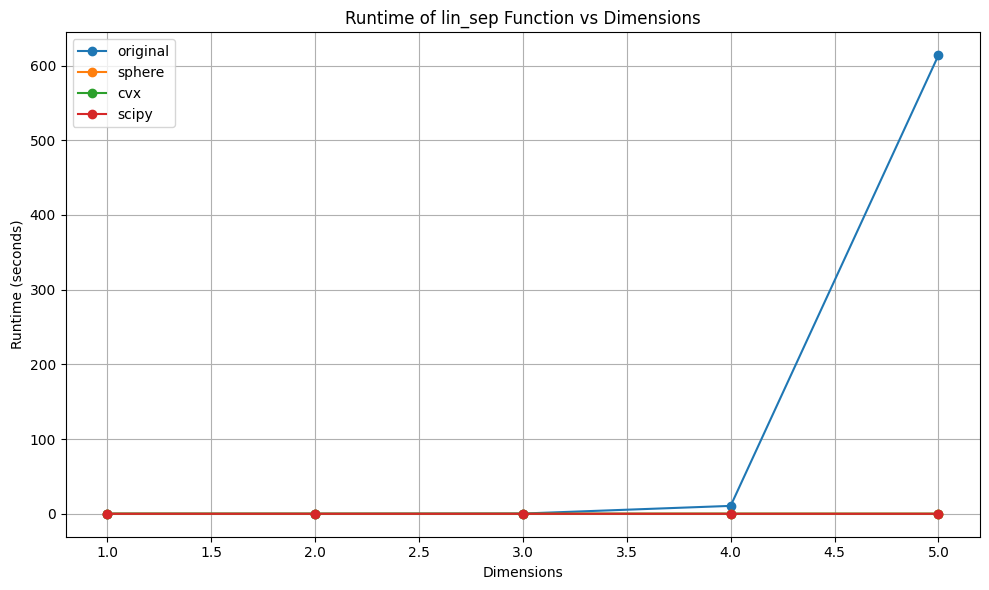

In [10]:
show_plots(o=True, sp=True, c=True, sc=True, n=100, d=[1,2,3,4,5])

### The original approach will exceed 600 seconds after 5 dimensions, so it will be excluded from further testing


# num_points = 100 dim = [1,5,10,25,50,100,500,1000,2000,3000]

Dimension: 1, Runtime: 0.04738 seconds
Dimension: 5, Runtime: 0.04351 seconds
Dimension: 10, Runtime: 0.04611 seconds
Dimension: 25, Runtime: 0.05109 seconds
Dimension: 50, Runtime: 0.06169 seconds
Dimension: 100, Runtime: 0.06666 seconds
Dimension: 500, Runtime: 0.16109 seconds
Dimension: 1000, Runtime: 0.26960 seconds
Dimension: 2000, Runtime: 0.46352 seconds
Dimension: 3000, Runtime: 0.66511 seconds
Dimension: 1, Runtime: 0.19746 seconds
Dimension: 5, Runtime: 0.11487 seconds
Dimension: 10, Runtime: 0.11849 seconds
Dimension: 25, Runtime: 0.20010 seconds
Dimension: 50, Runtime: 0.12445 seconds
Dimension: 100, Runtime: 0.15794 seconds
Dimension: 500, Runtime: 0.48076 seconds
Dimension: 1000, Runtime: 0.94898 seconds
Dimension: 2000, Runtime: 1.82809 seconds
Dimension: 3000, Runtime: 2.93700 seconds
Dimension: 1, Runtime: 0.00209 seconds
Dimension: 5, Runtime: 0.00197 seconds
Dimension: 10, Runtime: 0.00220 seconds
Dimension: 25, Runtime: 0.00384 seconds
Dimension: 50, Runtime: 0.0090

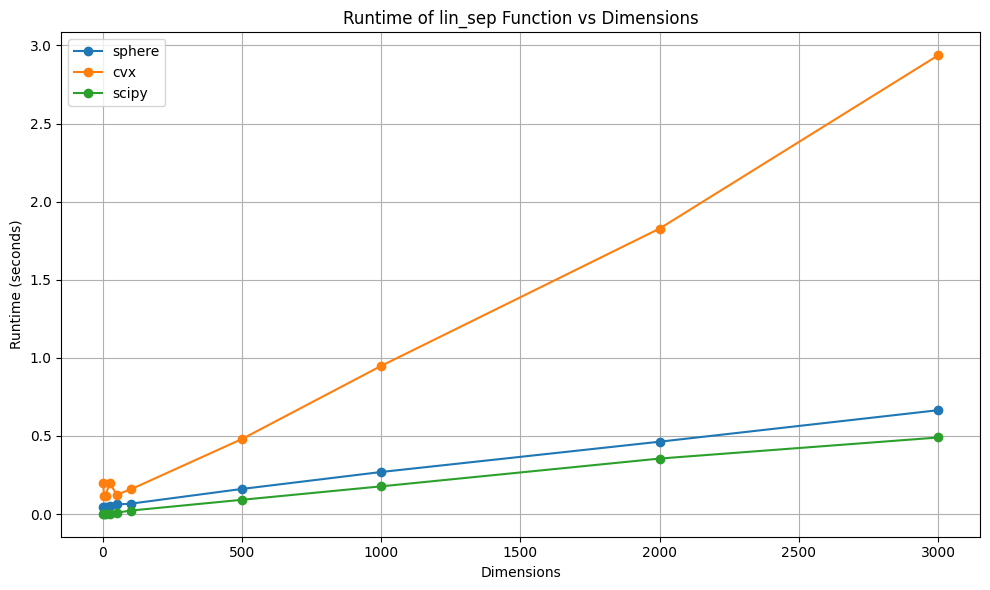

In [ ]:
show_plots(sp=True, c=True, sc=True, n=100, d=[1,5,10,25,50,100,500,1000,2000,3000])

# num_points = 1000 dim = [1,5,10,25,50,100,500,1000]


Dimension: 1, Runtime: 4.38438 seconds
Dimension: 5, Runtime: 4.60003 seconds
Dimension: 10, Runtime: 4.68981 seconds
Dimension: 25, Runtime: 5.02667 seconds
Dimension: 50, Runtime: 5.88373 seconds
Dimension: 100, Runtime: 6.68834 seconds
Dimension: 500, Runtime: 15.72357 seconds
Dimension: 1000, Runtime: 22.65266 seconds
Dimension: 1, Runtime: 1.40063 seconds
Dimension: 5, Runtime: 1.43610 seconds
Dimension: 10, Runtime: 1.35812 seconds
Dimension: 25, Runtime: 1.58309 seconds
Dimension: 50, Runtime: 1.75773 seconds
Dimension: 100, Runtime: 2.35451 seconds
Dimension: 500, Runtime: 11.36241 seconds
Dimension: 1000, Runtime: 103.90287 seconds
Dimension: 1, Runtime: 0.00660 seconds
Dimension: 5, Runtime: 0.00873 seconds
Dimension: 10, Runtime: 0.01325 seconds
Dimension: 25, Runtime: 0.02794 seconds
Dimension: 50, Runtime: 0.05973 seconds
Dimension: 100, Runtime: 0.14902 seconds
Dimension: 500, Runtime: 11.02328 seconds
Dimension: 1000, Runtime: 38.10451 seconds


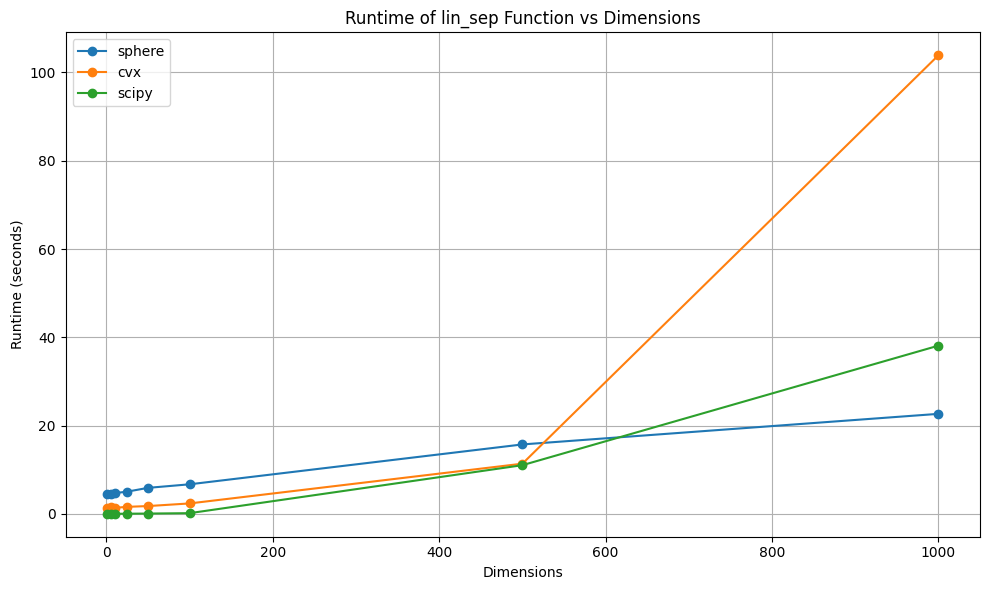

In [ ]:
show_plots(sp=True, c=True, sc=True, n=1000, d=[1,5,10,25,50,100,500,1000])

# num_points = 2000 dim = [1,5,10,50,100,500]

Dimension: 1, Runtime: 19.18211 seconds
Dimension: 5, Runtime: 19.46864 seconds
Dimension: 10, Runtime: 20.13039 seconds
Dimension: 25, Runtime: 21.48968 seconds
Dimension: 50, Runtime: 24.63983 seconds
Dimension: 100, Runtime: 27.96302 seconds
Dimension: 500, Runtime: 63.06252 seconds
Dimension: 1, Runtime: 2.76759 seconds
Dimension: 5, Runtime: 2.74196 seconds
Dimension: 10, Runtime: 2.96018 seconds
Dimension: 25, Runtime: 3.60465 seconds
Dimension: 50, Runtime: 4.41949 seconds
Dimension: 100, Runtime: 6.85288 seconds
Dimension: 500, Runtime: 43.25893 seconds
Dimension: 1, Runtime: 0.01056 seconds
Dimension: 5, Runtime: 0.01676 seconds
Dimension: 10, Runtime: 0.02539 seconds
Dimension: 25, Runtime: 0.05597 seconds
Dimension: 50, Runtime: 0.12161 seconds
Dimension: 100, Runtime: 0.31691 seconds
Dimension: 500, Runtime: 73.23426 seconds


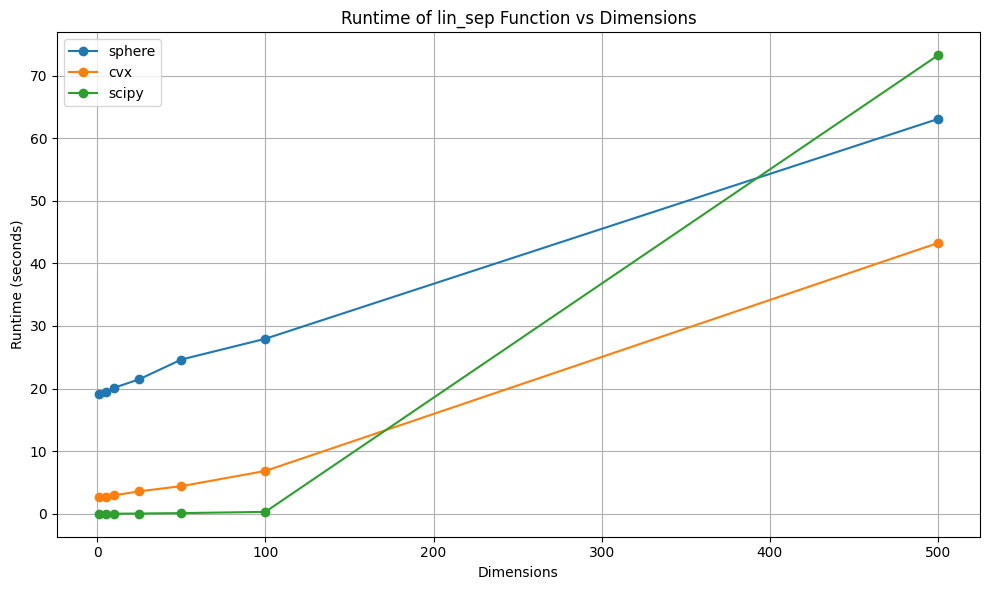

In [ ]:
show_plots(sp=True, c=True, sc=True, n=2000, d=[1,5,10,25,50,100,500])

# num_points = [1,2,5,10,50,100,500,1000] dim = 10


Number of points: 1, Runtime: 0.00165 seconds
Number of points: 2, Runtime: 0.00063 seconds
Number of points: 5, Runtime: 0.00062 seconds
Number of points: 10, Runtime: 0.00065 seconds
Number of points: 50, Runtime: 0.00104 seconds
Number of points: 100, Runtime: 0.00108 seconds
Number of points: 500, Runtime: 0.00159 seconds
Number of points: 1000, Runtime: 0.00258 seconds
Number of points: 1, Runtime: 0.01730 seconds
Number of points: 2, Runtime: 0.01627 seconds
Number of points: 5, Runtime: 0.01710 seconds
Number of points: 10, Runtime: 0.01669 seconds
Number of points: 50, Runtime: 0.01848 seconds
Number of points: 100, Runtime: 0.02087 seconds
Number of points: 500, Runtime: 0.04299 seconds
Number of points: 1000, Runtime: 0.07115 seconds
Number of points: 1, Runtime: 0.00143 seconds
Number of points: 2, Runtime: 0.00101 seconds
Number of points: 5, Runtime: 0.00095 seconds
Number of points: 10, Runtime: 0.00121 seconds
Number of points: 50, Runtime: 0.00183 seconds
Number of poin

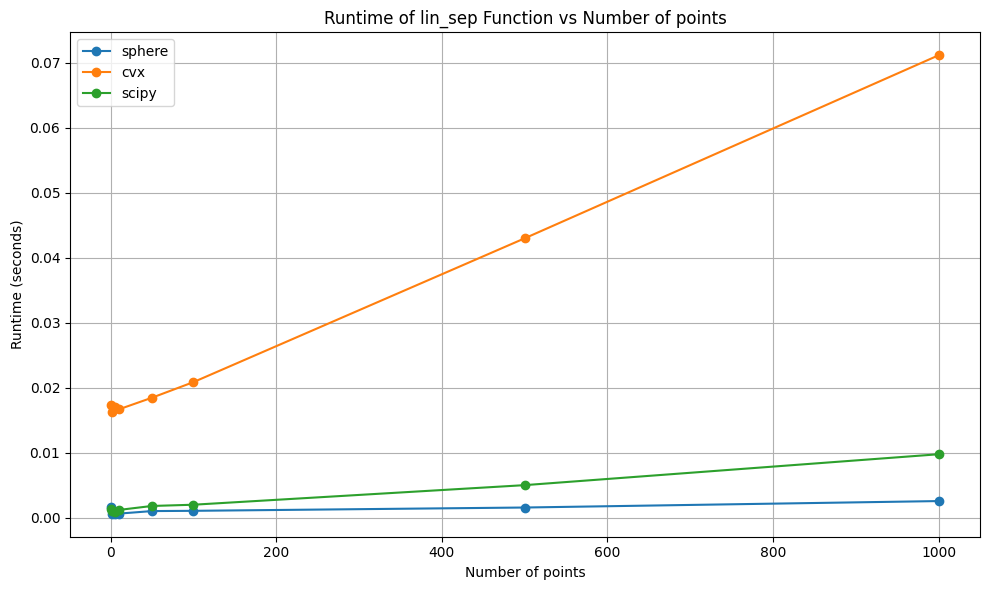

In [25]:
show_plots( sp=True, c=True, sc=True, n_iter=[1,2,5,10,50,100,500,1000], d=10, iter_num=True)

# num_points = [1,2,5,10,50,100,500,1000, 2000] dim = 100

Number of points: 1, Runtime: 0.04462 seconds
Number of points: 2, Runtime: 0.04678 seconds
Number of points: 5, Runtime: 0.04565 seconds
Number of points: 10, Runtime: 0.04616 seconds
Number of points: 50, Runtime: 0.06446 seconds
Number of points: 100, Runtime: 0.06898 seconds
Number of points: 500, Runtime: 0.17765 seconds
Number of points: 1000, Runtime: 0.24131 seconds
Number of points: 2000, Runtime: 0.41087 seconds
Number of points: 1, Runtime: 0.19517 seconds
Number of points: 2, Runtime: 0.12012 seconds
Number of points: 5, Runtime: 0.11405 seconds
Number of points: 10, Runtime: 0.11983 seconds
Number of points: 50, Runtime: 0.19055 seconds
Number of points: 100, Runtime: 0.16162 seconds
Number of points: 500, Runtime: 0.54006 seconds
Number of points: 1000, Runtime: 1.03605 seconds
Number of points: 2000, Runtime: 1.92057 seconds
Number of points: 1, Runtime: 0.00200 seconds
Number of points: 2, Runtime: 0.00149 seconds
Number of points: 5, Runtime: 0.00168 seconds
Number of 

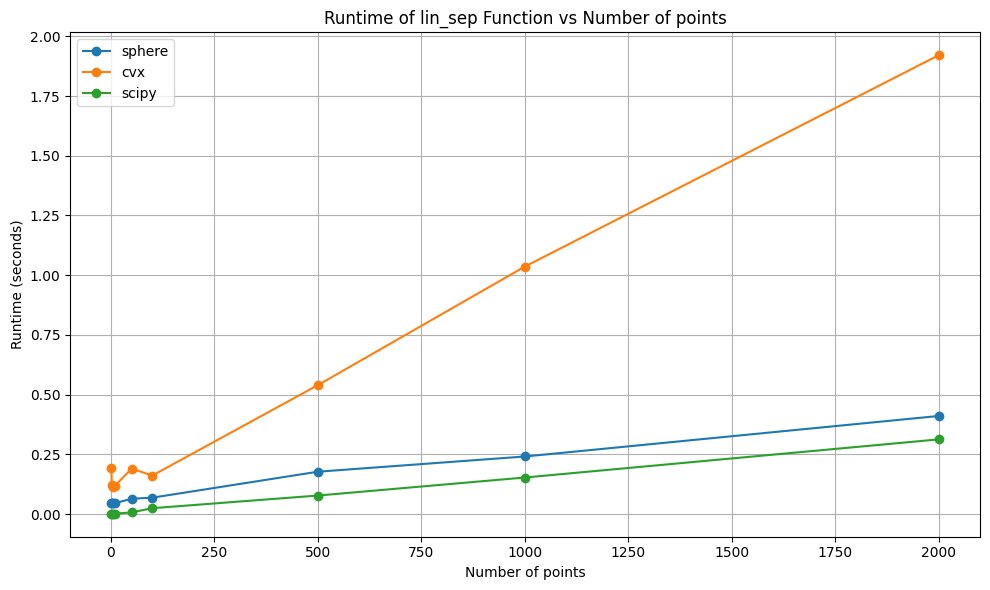

In [26]:
show_plots(sp=True, c=True, sc=True, n_iter=[1,2,5,10,50,100,500,1000, 2000], d=100, iter_num=True)


# num_points = [1,2,5,10,50,100,500,1000, 2000] dim = 1000

Number of points: 1, Runtime: 4.72770 seconds
Number of points: 2, Runtime: 4.81479 seconds
Number of points: 5, Runtime: 4.79045 seconds
Number of points: 10, Runtime: 5.03490 seconds
Number of points: 50, Runtime: 6.09014 seconds
Number of points: 100, Runtime: 6.95224 seconds
Number of points: 500, Runtime: 15.79992 seconds
Number of points: 1000, Runtime: 22.64706 seconds
Number of points: 2000, Runtime: 39.08921 seconds
Number of points: 1, Runtime: 1.43048 seconds
Number of points: 2, Runtime: 1.37402 seconds
Number of points: 5, Runtime: 1.36088 seconds
Number of points: 10, Runtime: 1.52097 seconds
Number of points: 50, Runtime: 1.85177 seconds
Number of points: 100, Runtime: 2.43723 seconds
Number of points: 500, Runtime: 10.78648 seconds
Number of points: 1000, Runtime: 47.43552 seconds
Number of points: 2000, Runtime: 209.01924 seconds
Number of points: 1, Runtime: 0.00613 seconds
Number of points: 2, Runtime: 0.00589 seconds
Number of points: 5, Runtime: 0.00833 seconds
Num

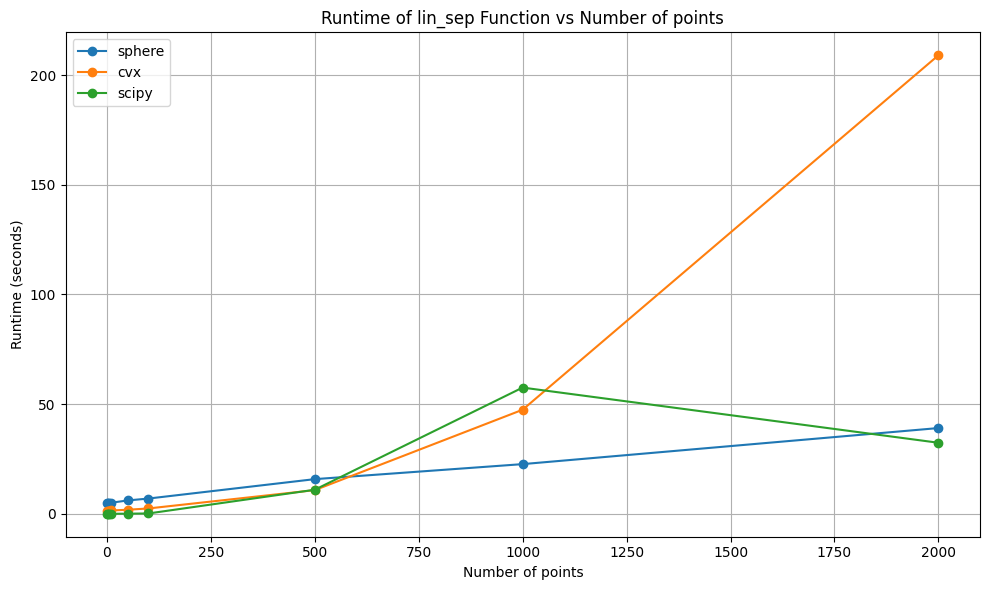

In [27]:
show_plots(sp=True, c=True, sc=True, n_iter=[1,2,5,10,50,100,500,1000, 2000], d=1000, iter_num=True)